<a href="https://colab.research.google.com/github/2303a52163/Generative-AI-2025/blob/main/2303A52163_WEEK10_ASSIGNMENT_10_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 63s 32ms/step - accuracy: 0.9117 - loss: 0.2863 - val_accuracy: 0.9863 - val_loss: 0.0398
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 59s 31ms/step - accuracy: 0.9862 - loss: 0.0440 - val_accuracy: 0.9872 - val_loss: 0.0385
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 29ms/step - accuracy: 0.9910 - loss: 0.0283 - val_accuracy: 0.9859 - val_loss: 0.0463
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 31ms/step - accuracy: 0.9941 - loss: 0.0191 - val_accuracy: 0.9907 - val_loss: 0.0299
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 29ms/step - accuracy: 0.9949 - loss: 0.0153 - val_accuracy: 0.9899 - val_loss: 0.0335
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9964 - loss: 0.0113 - val_accuracy: 0.9916 - val_loss: 0.0299
Epoch 7/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9973 - loss: 0.0083 - val_accuracy: 0.9921 - val_loss: 0.0304
Epoch 8/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9976 -

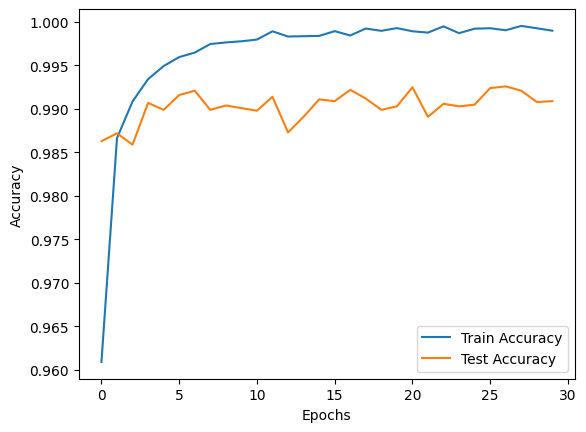

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_test, y_test))

train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"Training Accuracy: {train_acc:.4f}")
print(f"Testing Accuracy: {test_acc:.4f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
